# Resampling Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 2

In [2]:
#c-f

[(1-((1-1/n)**n)) for n in [5,100,10000]]

[0.6723199999999999, 0.6339676587267709, 0.6321389535670295]

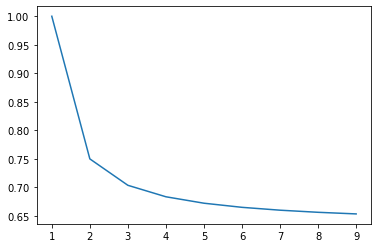

In [3]:
import numpy as np

plt.plot(np.arange(1,10), [(1-((1-1/n)**n)) for n in np.arange(1,10)])

In [4]:
data = np.random.randint(1,101,(10000,100))
np.any(data == 4, axis = 1).mean()

0.6359

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

default = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/default.csv")
default['default_int'] = np.where(default['default'] == 'Yes', 1, 0)
default.head(10)

,default,student,balance,income,default_int
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0
5,No,Yes,919.588530,7491.558572,0
6,No,No,825.513331,24905.226578,0
7,No,Yes,808.667504,17600.451344,0
8,No,No,1161.057854,37468.529288,0
9,No,No,0.000000,29275.268293,0


In [34]:
X = default[['income','balance']]
Y = default['default_int']
lr = LogisticRegression()
lr.fit(X, Y)

LogisticRegression()

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [36]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, lr.predict(X_test))

0.9684

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, lr.predict(X_test), labels = [1,0])

array([[   0,   79],
       [   0, 2421]])

In [39]:
(lr.predict(X_test) == Y_test).mean()

0.9684

In [40]:
import statsmodels.formula.api as smf

X_train_sm = X_train.join(Y_train)

results = smf.logit('default_int~income + balance', data = X_train_sm).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.078638
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_int   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7497
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Aug 2022   Pseudo R-squ.:                  0.4684
Time:                        14:04:05   Log-Likelihood:                -589.78
converged:                       True   LL-Null:                       -1109.5
Covariance Type:            nonrobust   LLR p-value:                1.908e-226
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.7572      0.507    -23.185      0.000     -12.751     -10.763
income      2.259e-05    5.8e-06      3.895      0.000    1.12e-05     3.4e-05
balance        0.0058      0.000     21.632      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [41]:
((results.predict(X_test) > .5) * 1 == Y_test).mean()

0.9748

#### 6

In [43]:
results = smf.logit('default_int ~ income + balance', data = default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_int   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Aug 2022   Pseudo R-squ.:                  0.4594
Time:                        14:04:16   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [54]:
df_params  = pd.DataFrame(columns = ['Intercept', 'income', 'balance'])

for i in range(100):
    default_sample = default.sample(len(default), replace= True)
    result_sample = smf.logit('default_int ~ income + balance', data = default_sample).fit(disp = 0)
    df_params = df_params.append(result_sample.params, ignore_index = True)

In [56]:
df_params.mean(), df_params.std()

(Intercept   -11.566798
 income        0.000021
 balance       0.005664
 dtype: float64,
 Intercept    0.420952
 income       0.000005
 balance      0.000214
 dtype: float64)

In [57]:
results.params, results.bse

(Intercept   -11.540468
 income        0.000021
 balance       0.005647
 dtype: float64,
 Intercept    0.434772
 income       0.000005
 balance      0.000227
 dtype: float64)

##### 7

In [60]:
weekly = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/weekly.csv")
weekly['direction'] = np.where(weekly['Direction'] == 'Up', 1, 0)
weekly.head(10)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1
5,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down,0
6,1990,-1.372,1.178,0.712,3.514,-2.576,0.151722,0.807,Up,1
7,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up,1
8,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up,1
9,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,Down,0


In [63]:
X = weekly[['Lag1', 'Lag2']]
Y = weekly['direction']
results = smf.logit('direction ~ Lag1 + Lag2', data = weekly).fit(disp = 0)
results.summary()

Intercept    0.221224
Lag1        -0.038722
Lag2         0.060248
dtype: float64

In [65]:
((results.predict(X)>0.5)*1 == Y).mean()

0.5555555555555556

In [66]:
X_01 = X[1:]
Y_01 = Y[1:]
results = smf.logit('direction ~ Lag1 + Lag2', data = weekly).fit(disp = 0)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Aug 2022   Pseudo R-squ.:                0.005335
Time:                        16:03:47   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

In [75]:
model = lr.fit(X_01, Y_01)
model.coef_

array([[-0.03840931,  0.06080633]])

In [80]:
model.predict([X.iloc[0]]) 

array([1])

In [85]:
errors = np.zeros(len(X))
for i in range(len(X)):
    leave_out = ~X.index.isin([i])
    model = lr.fit(X[leave_out], Y[leave_out])
    if model.predict([X.iloc[i]]) != Y.loc[i]:
        errors[i] = 1

errors.mean()       

0.44995408631772266

##### 8

In [147]:
np.random.seed(1)
X = np.random.randn(100)
Y = X - 2*X**2 + np.random.randn(100)

<AxesSubplot:>

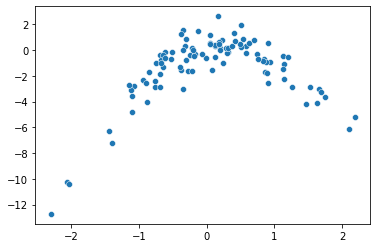

In [148]:
import seaborn as sns

sns.scatterplot(x = X, y = Y)

In [149]:
X.shape

(100,)

In [164]:
# Model 1
from sklearn.linear_model import LinearRegression

df = pd.DataFrame(np.array([np.ones(len(X)),X, X**2, X**3,X**4,Y]).T, columns = ['b0','X', 'X2', 'X3','X4', 'Y'])

X_vars = df.iloc[:,:5]
Y_var = df.iloc[:,-1]

model = LinearRegression()
errors = np.zeros((len(X_vars), 4))
for i in range(len(X_vars)):
    leave_out = ~X_vars.index.isin([i])
    for j in range(4):
        model.fit(X_vars.iloc[leave_out, :j+2], Y_var[leave_out])
        errors[i, j] = (model.predict([X_vars.iloc[i, :j+2]]) - Y_var[i])**2
errors.mean(axis = 0)

array([6.26076433, 0.91428971, 0.92687688, 0.86691169])

In [165]:
np.random.seed(2)

X = np.random.randn(100)
Y = X - 2*X**2 + np.random.randn(100)

df = pd.DataFrame(np.array([np.ones(len(X)),X, X**2, X**3,X**4,Y]).T, columns = ['b0','X', 'X2', 'X3','X4', 'Y'])

X_vars = df.iloc[:,:5]
Y_var = df.iloc[:,-1]

model = LinearRegression()
errors = np.zeros((len(X_vars), 4))
for i in range(len(X_vars)):
    leave_out = ~X_vars.index.isin([i])
    for j in range(4):
        model.fit(X_vars.iloc[leave_out, :j+2], Y_var[leave_out])
        errors[i, j] = (model.predict([X_vars.iloc[i, :j+2]]) - Y_var[i])**2
errors.mean(axis = 0)


array([11.61020827,  1.26528394,  1.28204182,  1.31659158])

##### 9

In [166]:
boston = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [167]:
boston['medv'].mean()

22.532806324110698

In [170]:
boston['medv'].std()/np.sqrt(len(boston))

0.4088611474975351

In [172]:
means = [boston['medv'].sample(n= len(boston), replace = True).mean() for i in range(1000)]
np.std(means)

0.4020602711184041

In [174]:
medv_conf =[boston['medv'].mean() - boston['medv'].std()/np.sqrt(len(boston))*1.962, boston['medv'].mean() + boston['medv'].std()/np.sqrt(len(boston))*1.962]
medv_conf

[21.730620752720533, 23.334991895500863]

In [176]:
import scipy.stats as st

st.t.interval(0.95, len(boston)-1, loc = np.mean(boston['medv']), scale = boston['medv'].std()/np.sqrt(len(boston)) )

(21.729528014578616, 23.33608463364278)

In [177]:
boston['medv'].median()

21.2

In [180]:
median_std = [boston['medv'].sample(n = len(boston), replace = True).median() for i in range(1000)]
np.std(median_std)

0.3655178655004427

In [181]:
boston['medv'].quantile(0.1)

12.75

In [184]:
quantile_std = [boston['medv'].sample(n = len(boston), replace = True).quantile(0.1) for i in range (1000)]
np.std(quantile_std)

0.48946648250927255